<a href="https://colab.research.google.com/github/yakupilyas/GoogleColabIntro/blob/main/Ders5_camera_h%C4%B1stogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


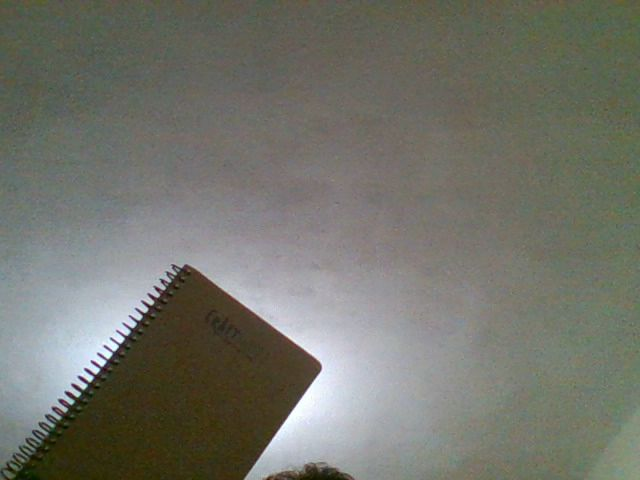

In [5]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

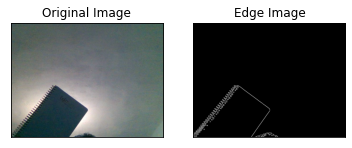

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('photo.jpg')
edges = cv2.Canny(img,100,200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

In [7]:
# Check the image matrix data type (could know the bit depth of the image)
print(img.dtype)
# Check the height of image 
print(img.shape[0])
# Check the width of image 
print(img.shape[1])
# Check the number of channels of the image
print(img.shape[2])

uint8
480
640
3


Text(0.5, 1.0, 'Original image')

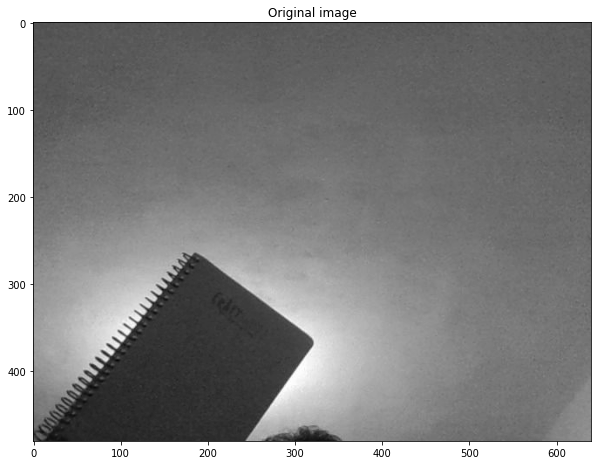

In [8]:
figsize = (10,10)

# read as grayscale
I = cv2.imread("photo.jpg",0)

plt.figure(figsize=figsize)
plt.imshow(I, cmap='gray', vmin=0, vmax=255)
plt.title("Original image")

In [9]:
bins_edges_min_max = [0,256]
num_bins=256
bin_count,bins_edges = np.histogram(I,num_bins,bins_edges_min_max)
bins_start = bins_edges[:-1]

Normalize the histogram to gat a discrete PDF

Text(0.5, 1.0, 'Original histogram')

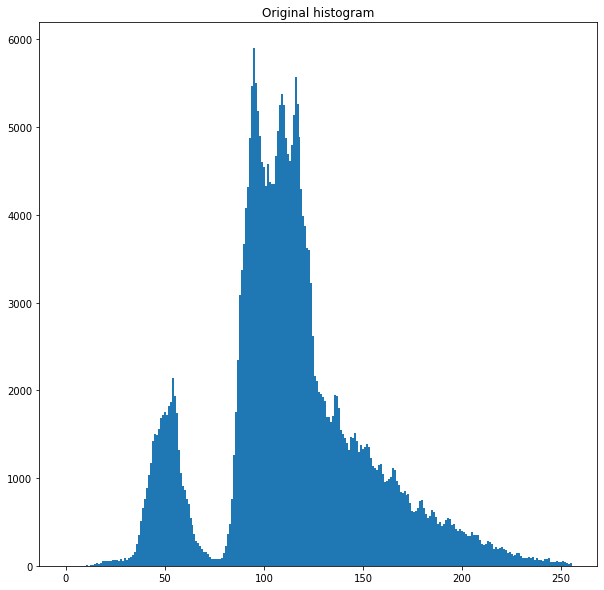

In [10]:
def draw_hist(x_axis,input):
    fig,ax = plt.subplots(figsize=figsize)
    # why not using plt.hist? because we want to plot also some derivations of this hist, so this is easier
    plt.bar(x_axis, input, width=input.shape[0]/(x_axis[-1]-x_axis[0]+1))
    return fig,ax

draw_hist(bins_start,bin_count)
plt.title("Original histogram")

Text(0.5, 1.0, 'Original PDF')

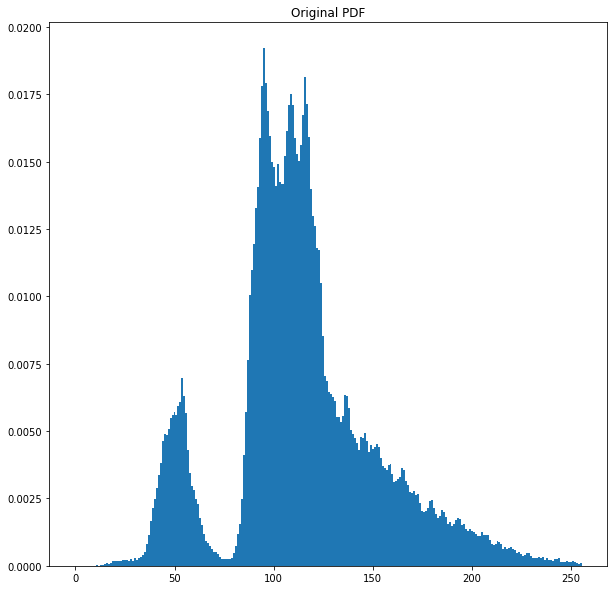

In [11]:
pdf = bin_count/np.sum(bin_count)

draw_hist(bins_start,pdf)
plt.title("Original PDF")


In [12]:
filename = 'photo.jpg'

img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)

#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]

#cv2.imshow('dst',img)


cv2.imwrite('output.jpg',img)

True

https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_filtering/py_filtering.html

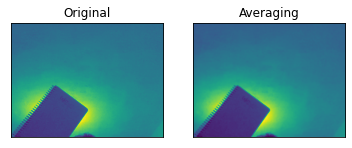

In [13]:

img = cv2.imread('photo.jpg',0)

kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(img,-1,kernel)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()